# Figure 1 

This script contains the analysis for generating plots in Figure 1. of Inge *et al.* _(Dev. Cell, 2025)_.

This script is proceeded by segmentation and quantification script "para_star.sh" for parallel StarDist nuclear segmentation on HPC cluster.

Functions are located in "Figure_1_Plotting_functions.py".

## Load Modules

In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from re import match
import warnings
warnings.filterwarnings("ignore")

import Figure_1_Plotting_functions as PF

%matplotlib inline

ingeo_colours = ["#0077BB", "#33BBEE", "#009988", "#EE7733", "#CC3311", "#EE3377", "#BBBBBB", "#5D55A4"]


## Figure 1A - Schematics of dose response and switching studies: 

Schematics were made in illustrator.

Schematics can be found in `Figure_1\All_panels\Figure_1A`.


## Figure 1B - Dose response overviews: 

Raw data for HAND1 GATA6 overviews are found in `Figure1B-C_DoseResponseData\Raw_Data`.  

Stiched images are found in `Figure1B-C_DoseResponseData\Selected_overview_Figure1B_and_S1FG`.  

Overviews were stiched together using the `Figure1B-C_DoseResponseData\OVERVIEW_MAKER.sh` bash script.


## Figure 1C - Proportion heatmaps: 

Plotting dose response heatmaps found in Figure 1C.
These plots show the proportions of mesoderm, endoderm and amnion cells as gated by HAND1 and GATA6 expression.

Data was analysed using the segmentation script located at `Figure1\Figure1B-C_DoseResponseData\Para_seg.sh`.  

Gating for each experiment is located in `Figure1\Figure1B-C_DoseResponseData\Raw_data` in each repeat folder.


Import gated data of cell fate proportions across dose response experiments, remove additional conditions and combine data into single dataframe.

In [2]:

DR_r1 = pd.read_csv("Figure1B-C_DoseResponseData/Processed/REPEAT1_GatedProportions.csv") # REPEAT1_OI_221019_DoseResponse72hr_ACT_BMP4_HAND1488_GATA6647_001
DR_r2 = pd.read_csv("Figure1B-C_DoseResponseData/Processed/REPEAT2_GatedProportions.csv") # REPEAT2_OI_2022_12_09_DoseResponse_HAND1647_GATA6568_TFAP2C488_72hr_repeat2_001
DR_r3 = pd.read_csv("Figure1B-C_DoseResponseData/Processed/REPEAT3_GatedProportions.csv") # REPEAT3_OI_2022_12_08_DoseResponse_HAND1647_GATA6568_TFAP2C488_72hr_001

data_ = pd.concat([DR_r1, DR_r2, DR_r3])
data_['Condition'] = data_[['Activin','BMP4']].agg('_'.join, axis=1)

**Pre-processing**:

In [3]:
#############################################################
### Converting conditions into concentration annotation #####
#############################################################

data_[['A', 'B']] = data_['Condition'].str.split('_', n=2, expand=True)
data_.B = data_.B.map(lambda x: x.lstrip('B').rstrip('aAbBcC'))
data_.A = data_.A.map(lambda x: x.lstrip('A').rstrip('aAbBcC'))

data_['Signal_cond'] = 'A' + data_['A'].astype(str) + '_B' + data_['B'].astype(str)
df = data_[["Signal_cond", "HAND1+GATA6-","HAND1-GATA6+","HAND1+GATA6+","HAND1-GATA6-"]]
order = list(df.Signal_cond.unique())

df = df.loc[df['Signal_cond'].isin(order)]
df = df.set_index("Signal_cond").loc[order]
df = df.reset_index()

df_hm = df.reset_index()
df_hm = df_hm.groupby(['Signal_cond']).mean()
df_hm = df_hm.reset_index()
df_hm[['A', 'B']] = df_hm['Signal_cond'].str.split('_', n=2, expand=True)

df_hm.B = df_hm.B.map(lambda x: x.lstrip('B').rstrip('aAbBcC'))
df_hm.A = df_hm.A.map(lambda x: x.lstrip('A').rstrip('aAbBcC'))

df_hm = df_hm[['A','B','HAND1+GATA6-', 'HAND1-GATA6+', 'HAND1+GATA6+', 'HAND1-GATA6-']]

**Heatmap figures**:

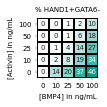

In [4]:
PF.Heatmap_figure(df_hm, 'HAND1+GATA6-', ingeo_colours[2], 0)

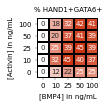

In [5]:
PF.Heatmap_figure(df_hm, 'HAND1+GATA6+', ingeo_colours[4], 0)

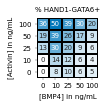

In [6]:
PF.Heatmap_figure(df_hm, 'HAND1-GATA6+', ingeo_colours[0], 0)

## Figure 1C - Fate ratio heatmaps:

Plots for the biasing of mesoderm and endoderm proportions in 1C

Fate biasing is calculated as:

- _Fate bias_ = _prop(Mesoderm) - prop(Endoderm)_ 
- _Mesoderm = prop(HAND1⁺ GATA6⁺)_
- _Endoderm = prop(HAND1⁻ GATA6⁺)_


**Heatmap figure**:

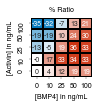

In [7]:
# Round the ratio to the nearest integer, or you can specify a number of decimals
df_hm["Ratio"] = np.round(df_hm["HAND1+GATA6+"] - df_hm["HAND1-GATA6+"], 0)

PF.Heatmap_figure_ratio(df_hm, "Ratio", colour_pal_sel=ingeo_colours[6], vmin_=0)

## Figure 1E - Switching B50 to A100B10:


Data was analysed using the segmentation script located at `Figure1\Figure1D-G_SwitchingData\Para_seg.sh`.  

Gating for each experiment is located in `Figure1\Figure1D-G_SwitchingData\Raw_data` in each repeat folder.

Import gated data of cell fate proportions across BMP-Activin switching experiments.

In [ ]:

FS_R1 = pd.read_csv("Figure1D-G_SwitchingData/Processed/20220306_R1_Proportions_processed.csv")
FS_R2 = pd.read_csv("Figure1D-G_SwitchingData/Processed/20221218_R2_Proportions_processed.csv")
FS_R3 = pd.read_csv("Figure1D-G_SwitchingData/Processed/20221218_R3_Proportions_processed.csv")


#######################################
### Grouping and aggregating data #####
#######################################


reps = pd.concat([FS_R1, FS_R2, FS_R3])
reps[['Treatment', 'Time','Repeat']] = reps['Condition'].str.split('_', 3, expand=True)
reps['Condition'] = reps[['Treatment', 'Time']].agg('_'.join, axis=1)

reps = reps.groupby(['Condition','Replicate']).mean()

reps = reps.reset_index()

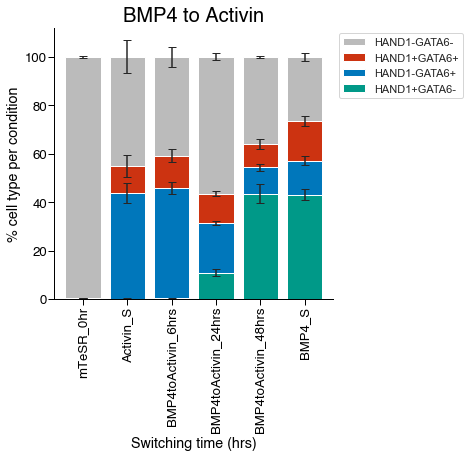

In [9]:
df = reps[["Condition", "HAND1+GATA6-","HAND1-GATA6+","HAND1+GATA6+","HAND1-GATA6-"]]

order= ["mTeSR_0hr","Activin_S","BMP4toActivin_6hrs","BMP4toActivin_24hrs","BMP4toActivin_48hrs", "BMP4_S"]

#order= ["mTeSR_0hr","BMP4_S", "ActivintoBMP4_6hrs","ActivintoBMP4_24hrs","ActivintoBMP4_48hrs", "Activin_S"]

#order= ["mTeSR_0hr","BMP4_S", "ActivintoBMP4_24hrs", "Activin_S"]

df = df.loc[df['Condition'].isin(order)]
df = df.set_index("Condition").loc[order]


df_means = df.groupby("Condition").mean()
df_stdev = df.groupby("Condition").sem()
df_means = df_means.reset_index()
df_stdev = df_stdev.reset_index()
df_means = df_means.set_index('Condition').loc[order]
df_stdev = df_stdev.set_index('Condition').loc[order]

with sns.plotting_context("notebook", font_scale=1.2):
    PF.create_stack_bar_plot(
        df_means,
        df_stdev,
        x_figSize=5,
        y_figSize=5,
        color_pal=[ingeo_colours[2], ingeo_colours[0], ingeo_colours[4], ingeo_colours[6]],
        bar_width=0.8,
        y_label="% cell type per condition",
        x_label="Switching time (hrs)"
    )
    
##Adjustments
    
    plt.title( "BMP4 to Activin", fontsize=20, weight='bold')

## Figure 1G - Switching B50 to A100B10:


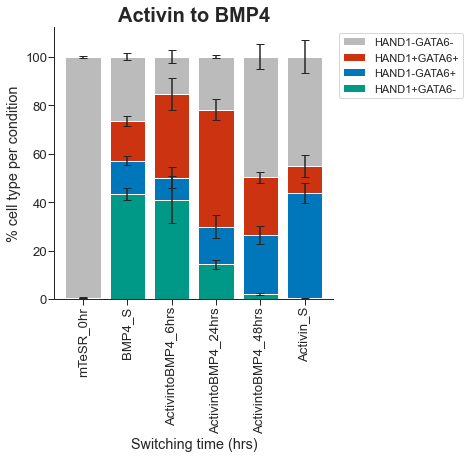

In [10]:
df = reps[["Condition", "HAND1+GATA6-","HAND1-GATA6+","HAND1+GATA6+","HAND1-GATA6-"]]

order= ["mTeSR_0hr","BMP4_S","ActivintoBMP4_6hrs","ActivintoBMP4_24hrs","ActivintoBMP4_48hrs", "Activin_S"]

#order= ["mTeSR_0hr","BMP4_S", "ActivintoBMP4_6hrs","ActivintoBMP4_24hrs","ActivintoBMP4_48hrs", "Activin_S"]

#order= ["mTeSR_0hr","BMP4_S", "ActivintoBMP4_24hrs", "Activin_S"]

df = df.loc[df['Condition'].isin(order)]
df = df.set_index("Condition").loc[order]


df_means = df.groupby("Condition").mean()
df_stdev = df.groupby("Condition").sem()
df_means = df_means.reset_index()
df_stdev = df_stdev.reset_index()
df_means = df_means.set_index('Condition').loc[order]
df_stdev = df_stdev.set_index('Condition').loc[order]

with sns.plotting_context("notebook", font_scale=1.2):
    PF.create_stack_bar_plot(
        df_means,
        df_stdev,
        x_figSize=5,
        y_figSize=5,
        color_pal=[ingeo_colours[2], ingeo_colours[0], ingeo_colours[4], ingeo_colours[6]],
        bar_width=0.8,
        y_label="% cell type per condition",
        x_label="Switching time (hrs)"
    )
    
##Adjustments
    
    plt.title( "Activin to BMP4", fontsize=20, weight='bold')
